# House Price Competition

**Author**: Raya Namazi  

**Kaggle Account**: Raya Namazi

**Description**: This project aims to build a regression model to predict the median house prices in Boston suburbs using various housing and environmental features.


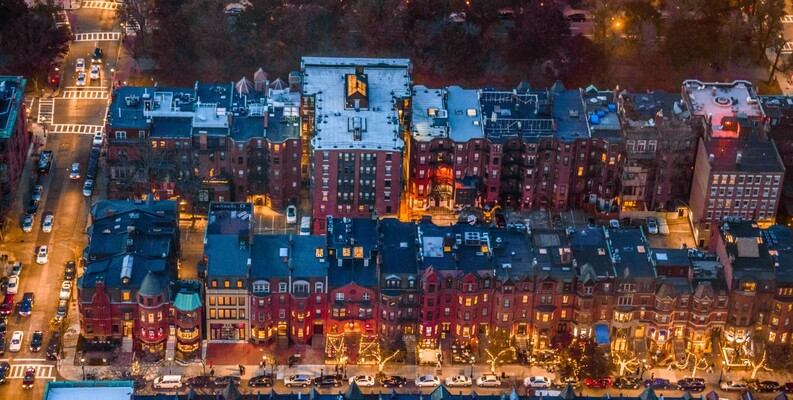

# Table of Contents

- 1. [Libraries](#libraries)
- 2. [loading the Dataset](#load)
- 3. [Getting some insights about the Dataset](#explore)
- 4. [Exploratory Data Analysis](#eda)
- 5. [Preprocessing](#preprocessing)
 - 1. [Dealing with missing values](#missing)
   - [Numerical cloumns](#missing-numerical)
   -[categorical columns](#missing-categorical)
 - 2. [Dealing with outliers](#outliers)
 - 3. [Feature Engineering](#feature)
 - 4. [Normalization](#normalization)
 - 5. [One-hot Encoding](#onehot)
- 6. [Splitting into train and test sets](#split)
- 7. [Validation function](#validation)
- 8. [Feature Selection](#shap)
- 9. [Models](#models)
  - 1. [Libraries](#model-lib)
  - 2. [Regularized Regression](#regularized)
   - 3. [Lasso Regression](#lasso)
   - 4. [Ridge Regression](#ridge)
   - 5. [ElasticNet Regression](#elastic)
 - 3. [Support Vector Machine](#svm)
 - 4. [Boosting Algorithms](#boosting)
  - 1. [XGBoost](#xgboost)
  - 2. [Light Gradient Boosting](#lgbm)
  - 3. [CatBoost](#catboost)
  - 4. [Gradient Boosting](#gboost)
  - 5. [K-Nearest Neighbors](#knn)
- 10. [Averaging Models](#ensemble)  


<a name="libraries"></a>
# Libraries

First, we import the libraries we will need for preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

<a name="load"></a>
# Load the Dataset
Next, we load the dataset which contains train and test sets.

In [ ]:
train_set = pd.read_csv('train.csv',index_col='Id')
test_set = pd.read_csv('test.csv',index_col='Id')

We need to separate the target column from the features in the training set, since we are going to train our models on this dataset.

We also create a new dataset by concatenating the train and test sets for later preprocessing steps.

In [ ]:
X_train = train_set.drop('SalePrice',axis=1)
y_train = train_set['SalePrice']
X_test = test_set
X = pd.concat([X_train,X_test],axis=0)

<a name="explore"></a>
# Get some insights about the Dataset
Now, let's take a look at the features and understand how the dataset is structured.

In [ ]:
print('train set shape is : ',X_train.shape)
print('test set shape is : ',X_test.shape)

train set shape is :  (1460, 79)
test set shape is :  (1459, 79)


In [ ]:
print('total set shape is : ',X.shape)

total set shape is :  (2919, 79)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

As we can see, there are some steps we need to take to clean the dataset before moving on to the next stages.

Let's take a closer look at the features we have.

In [ ]:
print('numerical columns are:  ')
print(X.select_dtypes(include=['int64','float64']).columns)

numerical columns are:  
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [ ]:
print('categorical columns are:  ')
print(X.select_dtypes(include=['object']).columns)

categorical columns are:  
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


<a name="eda"></a>
# Exploratory Data Analysis

Numerical Feature Relationships

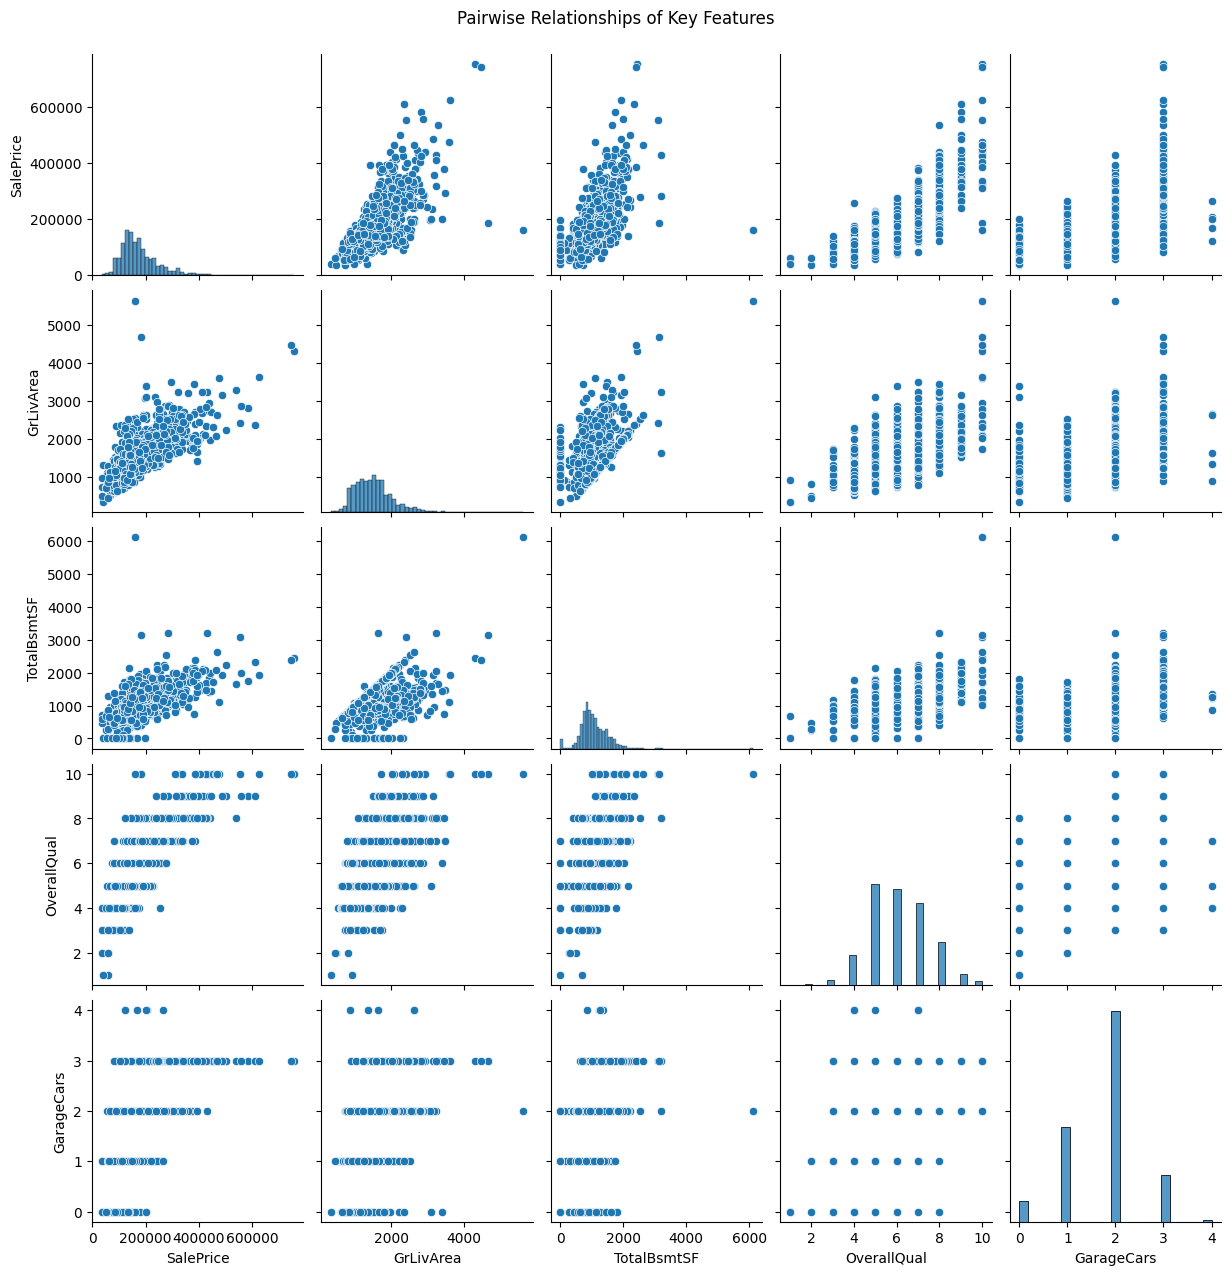

In [ ]:
sns.pairplot(train_set[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars']])
plt.suptitle('Pairwise Relationships of Key Features', y=1.02)
plt.show()

Categorical Feature Analysis

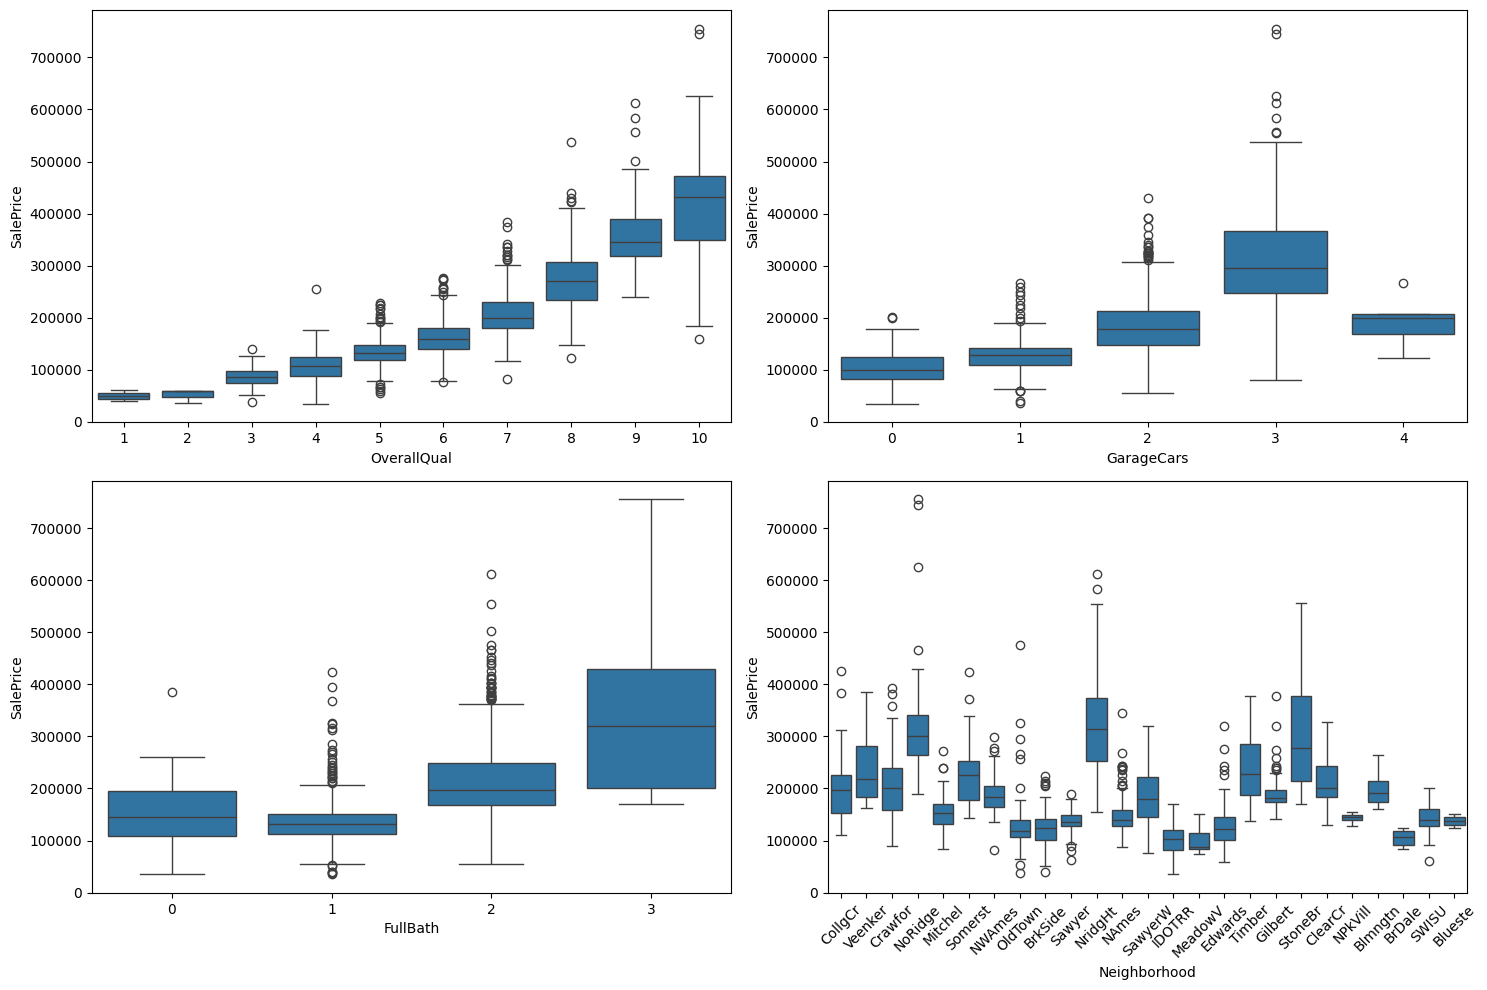

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_set, ax=ax[0, 0])
sns.boxplot(x='GarageCars', y='SalePrice', data=train_set, ax=ax[0, 1])
sns.boxplot(x='FullBath', y='SalePrice', data=train_set, ax=ax[1, 0])
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_set, ax=ax[1, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a name="preprocessing"></a>
# Preprocessing

We will now proceed to clean the dataset.

<a name="missing"></a>
### Dealing with missing values

The first step in preprocessing is to handle missing values.
We need to handle null values due to several issues, such as training errors that some models are sensitive to.
The dataset contains both numerical and categorical features with missing entries.

 A closer look at the details of the features reveals that each type of missing value should be handled using a different method.

<a name="missing-numerical"></a>
#### Numerical columns

Let's take a closer look at the numerical columns, especially to check which features have missing values.

In [ ]:
numerical_columns = X.select_dtypes(exclude=['object']).columns
X[numerical_columns].isnull().sum()

,0
MSSubClass,0
LotFrontage,486
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1


I categorized the columns with missing values based on the methods used to fill them.

- **Type 1 :** These columns are related to basement and garage features. Since not all houses have these features, we can simply fill the null values with 0.
- **Type 2 :** Each house should have a loft, so we can't fill null values with zero. Also, it’s not efficient to simply drop this feature because it can have a direct effect on the house price, so one od the optimal approaches would be to simply fill the missing values by the mean value.
- **Type 3 :** It would be an optimal choice to fill the garage's built year with the house's built year.

In [ ]:
type_1 = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
type_2 = ['LotFrontage']
type_3 = ['GarageYrBlt']

In [ ]:
X[type_1] = X[type_1].fillna(0)
X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

<a name="missing-categorical"></a>
#### Categorical columns

Now, it's time to apply the above approaches to the categorical columns.

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns].isnull().sum()

,0
MSZoning,4
Street,0
Alley,2721
LotShape,0
LandContour,0
Utilities,2
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


- **Type 1 :** These features include those that every house should have, so we cannot fill them with ` none `. Instead, we fill them with the most frequent value in each column.
- **Type 2 :** This category includes features that not all households have, so a missing value may simply indicate ` none `.

In [ ]:
type_1 = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
type_2 = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','SaleType']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X[type_1] = pd.DataFrame(imputer.fit_transform(X[type_1]), index=X.index)
X[type_2] = X[type_2].fillna('None')

Let's make sure there are no missing values left.

In [ ]:
X.isnull().sum().sum()

np.int64(0)

<a name="outliers"></a>
## Dealing with outliers

Let's take closer look for at the relation between ` GrLiveArea ` and the sales price.

In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(x = train_set['GrLivArea'], y = train_set['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

As we can see, there are two data points that are considered outliers. Let's simply drop them.

In [ ]:
# outlier_index = train_set[(train_set.GrLivArea > 4000)& (train_set.SalePrice < 200000)].index
# X.drop(outlier_index, axis=0, inplace=True)
# y_train.drop(outlier_index, axis=0, inplace=True)

<a name="feature"></a>
## Feature Engineering

Now, it's time to do some feature engineering. I’ll add two simple features and continue with the next steps, but we can always come back later to add more robust features.

In [ ]:
X['HouseAge'] = X.YrSold - X.YearBuilt
X['TotalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
#X['TotalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)

The ` MSSubClass ` feature is more categorical in nature, as it only takes a limited set of predetermined values, so we convert it to a string. This way, it will be considered a categorical feature during the encoding step.

In [ ]:
X['MSSubClass'] = X['MSSubClass'].astype(str)

<a name="normalization"></a>
## Normalization
For the normalization step, let's first examine the skewed features and their skewness.

In [ ]:
from scipy.stats import skew
numerical_columns = X.select_dtypes(exclude=['object']).columns
skewed_features = X[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features

,0
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


Next, we make the distributions of skewed features more normal by applying the Box-Cox transformation before standardizing them.

In [ ]:
skewed_features = skewed_features[abs(skewed_features) > 0.75]

In [ ]:
from scipy.special import boxcox1p
skewed_features = skewed_features.index
lam = 0.15
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat], lam)

In [ ]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
y_train = np.log1p(1 + y_train)

In [ ]:
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,TotalSqFeet
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,-0.153123,-0.091590,0.044536,0.564577,-0.035520,-0.223988,0.418333,-0.216906,1.094487,-0.235396,...,-0.163010,1.120508,0.100972,0.682297,0.045093,0.409550,0.053272,-0.103631,0.031157,-0.001602
std,1.208995,1.150996,0.704974,1.113131,0.637715,0.535752,0.536993,0.454853,3.057576,1.061601,...,0.521653,2.643799,0.899183,2.214175,0.678242,2.204996,0.678690,0.657482,0.638656,0.772826
min,-4.131021,-3.939814,-2.500000,-4.000000,-2.126316,-1.102564,0.000000,-0.844010,0.000000,-3.147212,...,-0.714219,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250000,-1.000000,-0.757895,-4.273432
25%,-0.544285,-0.528835,-0.500000,0.000000,-0.410526,-0.717949,0.000000,-0.844010,0.000000,-0.556124,...,-0.714219,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.500000,-0.589474,-0.494446
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.455715,0.471165,0.500000,1.000000,0.589474,0.282051,1.000000,0.155990,0.000000,0.443876,...,0.285781,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.410526,0.505554
max,6.500693,9.156989,2.000000,4.000000,0.778947,0.435897,1.760571,0.725722,13.354279,1.425295,...,1.179522,12.158991,10.312501,10.634887,11.507463,22.072880,1.500000,1.000000,2.126316,4.393536


<a name="onehot"></a>
## One-hot Encoding

As part of data preprocessing, we need to convert all values to numerical format. One efficient method that can also improve the training process is using One-hot Encoding.

In [ ]:
X = pd.get_dummies(X,drop_first=True,dtype=int)

In [ ]:
X.shape

(2919, 275)

<a name="split"></a>
# Splitting into train and test sets

Finally, it's time to split our train and test sets again.

In [ ]:
ntest = len(test_set)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1460, 275)
X_test.shape: (1459, 275)


# Feature Selection
<a name="shap"></a>
Let's try feature selection using SHAP using an xgboost model.

In [ ]:
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)

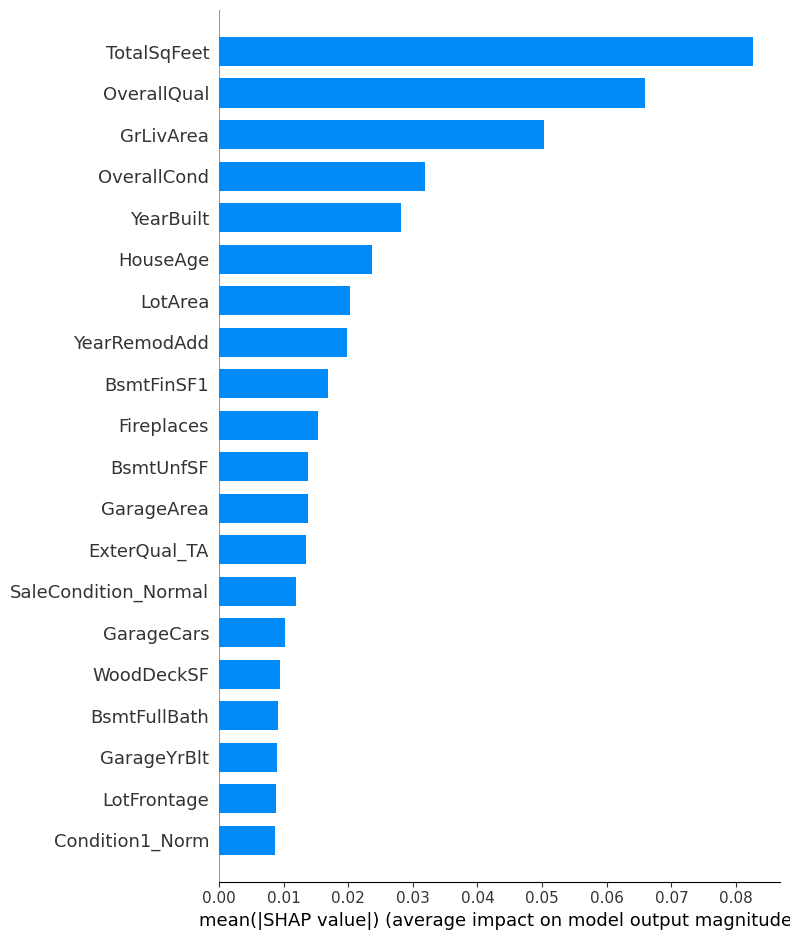

In [ ]:
import shap

xgboost_model.fit(X_train, y_train)
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_train)

# Plot feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Select top N features
N = 150
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(shap_values).mean(0)})
top_features = importance_df.nlargest(N, 'importance')['feature'].values
X_train = X_train[top_features]
X_test = X_test[top_features]

<a name="validation"></a>
# Validation Function
Before proceeding to the training step, let's define a wrapper function to evaluate the model's performance on the training set using k-fold cross-validation.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def getRMSLE(model):

    kf = KFold(n_folds, shuffle=True, random_state=42)

    rmse = np.sqrt(-cross_val_score(
        model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()


<a name="models"></a>
# Models

Now, it's time to train the models. For this part, we will start with some simple models and then use an ensemble learning approach to achieve better results.

<a name="model-lib"></a>
## Libraries

First, we import the libraries that we will use later during the training process.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin, clone
import catboost as cb
import optuna
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

<a name="regularized"></a>
## Regularized Regressions

We start with regularized regressions. These regression techniques include regularization hyperparameters that help constrain the weights, making the models more robust and reducing overfitting.

<a name="lasso"></a>
 ### Lasso Regression

Lasso Regression constrains the weights using L1 regularization, which adds a penalty term to the linear regression objective function, defined as:

$
\min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^n \left( y_i - \mathbf{x}_i^\top \beta \right)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\}
$


Let's find the optimal value for the L1 regularization hyperparameter by plotting the L1 parameter against the Root Mean Squared Logarithmic Error (RMSLE).

Best lambda: 0.0005210526315789474
RMSLE: 0.130971577277975


Text(0, 0.5, 'RMSLE')

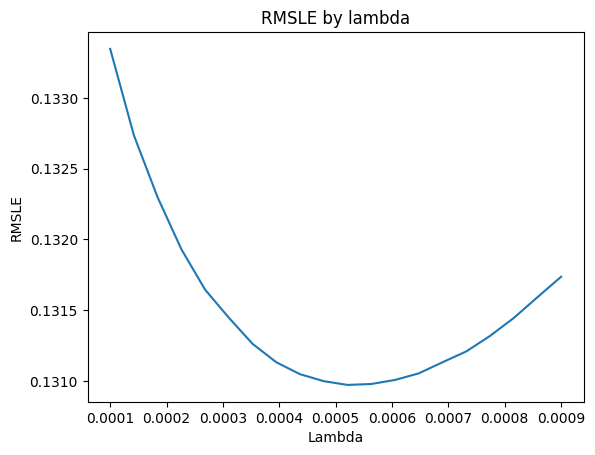

In [ ]:
lambdas = list(np.linspace(0.0001, 0.0009, 20))
scores = []
best_lambda = 0
best_score = 1

for lambda_ in lambdas:
    lasso_model = Lasso(alpha=lambda_, max_iter=100000)
    score = getRMSLE(lasso_model)
    scores.append(getRMSLE(lasso_model))
    if score < best_score:
        best_score = score
        best_lambda = lambda_

print("Best lambda:", best_lambda)
print("RMSLE:", best_score)

scores = pd.Series(scores, index=lambdas)
scores.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

In [ ]:
lasso_model = Lasso(alpha=best_lambda, max_iter=100000)

<a name="ridge"></a>
### Ridge Regression

Similar to Lasso Regression, Ridge Regression also constrains the weights by adding an L2 regularization penalty term to the objective function, defined as :

$
\min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^n \left( y_i - \mathbf{x}_i^\top \beta \right)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\}
$

Just like we did for Lasso Regression, let's now find the optimal L2 hyperparameter

Best lambda: 20.0
RMSLE: 0.13153077310225644


Text(0, 0.5, 'RMSLE')

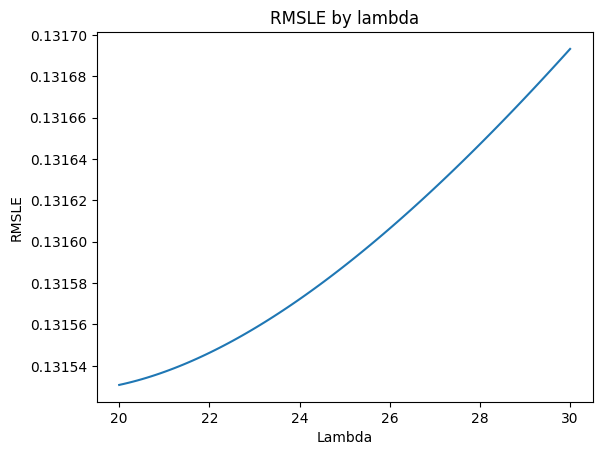

In [ ]:
lambdas = list(np.linspace(20,30,100))
scores = []
best_lambda = 0
best_score = 1

for lambda_ in lambdas:
    ridge_model = Ridge(alpha=lambda_, max_iter=100000)
    score = getRMSLE(ridge_model)
    scores.append(getRMSLE(ridge_model))
    if score < best_score:
        best_score = score
        best_lambda = lambda_

print("Best lambda:", best_lambda)
print("RMSLE:", best_score)

scores = pd.Series(scores, index=lambdas)
scores.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

In [ ]:
ridge_model = Ridge(alpha=best_lambda, max_iter=100000)

**Note:** A key difference between L1 and L2 regularization is that the L1 penalty term can shrink some weights to zero, which is useful for feature selection and leads to sparse models. In contrast, the L2 penalty term minimizes the weights but doesn’t eliminate them, resulting in more stabilized features.

<a name="elastic"></a>
### ElasticNet

Another regularized regression technique is ElasticNet, which combines both L1 and L2 regularization. It is defined as follows:

$
\min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \mathbf{x}_i^\top \beta \right)^2 + \lambda \left[ \alpha \sum_{j=1}^{p} |\beta_j| + (1 - \alpha) \sum_{j=1}^{p} \beta_j^2 \right] \right\}
$

We use gridsearch for tuning L1 and L2 terms.

In [ ]:
param_grid = {
    'alpha': [0.001,0.01,0.1, 1.0],
    'l1_ratio': [0.01,0.1,0.2, 0.5, 0.8],
}
en_model = ElasticNet()

grid_search = GridSearchCV(estimator=en_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.8]})

In [ ]:
params = grid_search.best_params_
print("Best parameters:", params)

Best parameters: {'alpha': 0.001, 'l1_ratio': 0.5}


In [ ]:
score = getRMSLE(grid_search)
print("Best RMSLE:", score)

Best RMSLE: 0.13114553737377838


In [ ]:
en_model = grid_search.best_estimator_

<a name="svm"></a>
## Support Vector Machine

Support Vector Regression algorithm works is a regression technique based on Support Vector Machines. It fits a function within a specified margin of tolerance to predict continuous outcomes.

I used [this notebook](https://www.kaggle.com/code/kenjee/exhaustive-regression-parameter-tuning#Hyperparameter-Tuning---Gradient-Boosted-Regression) for the hyperparameter tuning.

In [ ]:
svm_model = SVR()

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
grid_search = GridSearchCV(svm_model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
params = grid_search.best_params_
print("Best parameters:", params)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svm_model = grid_search.best_estimator_

In [ ]:
getRMSLE(svm_model)

np.float64(0.12807775019184953)

<a name="boosting"></a>
## Boosting Algorithms

Boosting algorithms are ensemble methods that combine many weak learners (usually decision trees) into a strong one. They work by training models sequentially, where each new model focuses on correcting the mistakes of the previous ones.

<a name="xgboost"></a>
### XGBoost

XGBoost (Extreme Gradient Boosting) is a highly optimized, scalable implementation of gradient boosting. It builds decision trees sequentially, where each tree corrects the errors of the previous ones, and uses gradient descent to minimize loss.


In [ ]:
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}


# xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     verbose=1,
#     n_jobs=-1
# )

xgboost_model = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)
getRMSLE(xgboost_model)


score = getRMSLE(xgboost_model)
print("Best RMSLE:", score)

Best RMSLE: 0.1279705093503775


<a name="lgbm"></a>
### LightGBM
LightGBM (Light Gradient Boosting Machine) is another gradient boosting framework, designed to be faster and more memory-efficient than XGBoost.

In [ ]:
param_grid = {
    'num_leaves': [5,8,10],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500,700],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [0, 0.1, 1.0],
    'min_split_gain': [0, 0.01, 0.1]
}

# lgbm = LGBMRegressor(objective='regression', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_grid,
#     n_iter=50,
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
lightgbm_model = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)
getRMSLE(lightgbm_model)

score = getRMSLE(lightgbm_model)
print("Best RMSLE:", score)

In [ ]:
#lightgbm_model = random_search

<a name="catboost"></a>
### CatBoost

CatBoost is a gradient boosting algorithm developed by Yandex, designed to handle categorical features efficiently without heavy preprocessing (like one-hot encoding).

I used [this guide](https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/) for catboost hyperparameter tuning.


In [ ]:
catboost_model = CatBoostRegressor()

In [ ]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    catboost_model = cb.CatBoostRegressor(**params, silent=True)
    catboost_model.fit(X_train, y_train)
    rmsle = getRMSLE(catboost_model)
    return rmsle

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2025-08-16 06:32:16,549] A new study created in memory with name: no-name-a6d1bd34-4d03-4c51-8911-ba35f6c06538
[I 2025-08-16 06:32:22,023] Trial 0 finished with value: 0.2608670918274152 and parameters: {'learning_rate': 0.0014350072422205616, 'depth': 1, 'subsample': 0.3353303189624178, 'colsample_bylevel': 0.8615191846346398, 'min_data_in_leaf': 31}. Best is trial 0 with value: 0.2608670918274152.
[I 2025-08-16 06:32:26,795] Trial 1 finished with value: 0.21793986873618837 and parameters: {'learning_rate': 0.0016916909432679603, 'depth': 3, 'subsample': 0.9522872555179615, 'colsample_bylevel': 0.07772616117303358, 'min_data_in_leaf': 6}. Best is trial 1 with value: 0.21793986873618837.
[I 2025-08-16 06:32:29,843] Trial 2 finished with value: 0.2580231821184663 and parameters: {'learning_rate': 0.0017053386765494675, 'depth': 1, 'subsample': 0.2406736006437616, 'colsample_bylevel': 0.1781661411307347, 'min_data_in_leaf': 35}. Best is trial 1 with value: 0.21793986873618837.
[I 2025

<a name="knn"></a>
## K-Nearest-Neighbors

K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for classification and regression.

It works by finding the k closest data points (neighbors) to a query point, based on a distance metric (like Euclidean distance). For regression, it averages the neighbor values.

In [ ]:
knn_model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
params = grid_search.best_params_
print("Best parameters:", params)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
knn_model = grid_search.best_estimator_

In [ ]:
getRMSLE(knn_model)

np.float64(0.1664070876332139)

<a name="ensemble"></a>
# Averaging Models

Now, we use all the models, we tuned earlier to create our final model by averaging them like an enemble learning model.

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(m) for m in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [ ]:
models = [lasso_model, ridge_model, xgboost_model, lightgbm_model,catboost_model]
ensemble_model = AveragingModels(models)

In [ ]:
ensemble_model.fit(X_train,y_train)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] feature_fraction is set=0.24, 

AveragingModels(models=[Lasso(alpha=np.float64(0.0005210526315789474),
                              max_iter=100000),
                        Ridge(alpha=np.float64(20.0), max_iter=100000),
                        XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.46, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_type...
                                     multi_strategy=None, n_estimators=2100,
                                     n_jobs=2, nthread=-1, ...),
                        LGBMRegressor(bagging_fraction=0.78, bagging_freq=5,
                                      bagging_seed=9, feature_fraction=0.24,
                                      feature_fraction_seed=9,
                                      learning_rate=0.05, max_bin=55,
                                      max_depth=3, min_data_in_leaf=4,
                                      min_sum_hessian_in_leaf=11,
                                      n_estimators=730, num_leaves=8,
                                      objective='regression'),
                        <catboost.core.CatBoostRegressor object at 0x7df6fc7c4250>])

In [ ]:
predictions = ensemble_model.predict(X_test)
predictions = np.exp(predictions)-1

In [ ]:
result = pd.DataFrame({'Id': test_set.index, 'SalePrice': predictions})
result.to_csv('submission.csv', index=False)